# 300W Results - Indoor

This jupyter notebook summarises the results of the active appearance models which were trained using the *menpo* Python Package.  For more information regarding the training of these models please refer to:

1. Section 4 of the Review Paper
2. The Active Appearance Model base class contained within *aam.py*
3. The holisitc AAM and patch AAM models described within *300W_aam_hol_indoor_py* and *300W_aam_patch_indoor.py*

This notebook will contained the cumulative error distribution curves produced by the models as well as a selection from literature.

-------------------------------------------------------------------------------------------------------------------------

## Resource Utilisation

| Model | Time (hh:mm:ss)   |  Avg # CPUs Used |  Memory Used (GB) |
|-------|-------------------|------------------|-------------------|
|  hAAM |     00:06:14      |       5.53       |        2.6        |
|  pAAM |     00:03:09      |       4.47       |        1.8        |
-------------------------------------------------------------------------------------------------------------------------
## Test Set

A brief description of the test set used during the experiment.  Note that the same test set was used for both holistic and patch experiments.

In [1]:
import os
with open('300W_aam_hol_indoor_testset.txt', 'r') as f:
    test_set_filenames = f.read().split('\n')

print("The test set comprised of %i images\n" % len(test_set_filenames))
print("Listing the first 10 images:")

# Print summary
test_set_filenames = [os.path.basename(filename) for filename in test_set_filenames]
print("\t".join(test_set_filenames[:10]) + "...")

The test set comprised of 90 images

Listing the first 10 images:
indoor_204.png	indoor_267.png	indoor_153.png	indoor_010.png	indoor_234.png	indoor_227.png	indoor_197.png	indoor_110.png	indoor_006.png	indoor_176.png...


## Cumulative Error Distribution Curves

The following chart shows the normalised error distribution as produced by the holisitic and patch AAMs vs that described by Yan et al. in 2013<sup>1</sup>, Zhou et al. in 2013<sup>2</sup> and He et al. in 2017<sup>3</sup>

1. Yan, J., Lei, Z., Yi, D., & Li, S. Z. (2013). Learn to combine multiple hypotheses for accurate face alignment. In Proceedings of the IEEE International Conference on Computer Vision (pp. 392–396). http://doi.org/10.1109/ICCVW.2013.126
2. Zhou, E., Fan, H., Cao, Z., Jiang, Y., & Yin, Q. (2013). Extensive facial landmark localization with coarse-to-fine convolutional network cascade. In Proceedings of the IEEE International Conference on Computer Vision (pp. 386–391). Institute of Electrical and Electronics Engineers Inc.
3. Milborrow, S., Bishop, T. E., & Nicolls, F. (2013). Multiview active shape models with SIFT descriptors for the 300-W face landmark challenge. In Proceedings of the IEEE International Conference on Computer Vision (pp. 378–385). https://doi.org/10.1109/ICCVW.2013.57

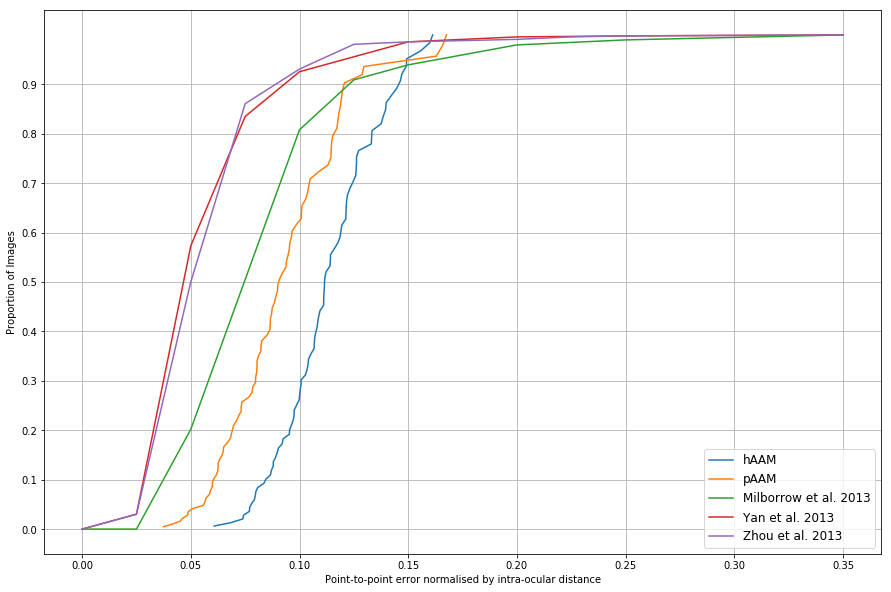

In [3]:
import numpy as np

# Import and configure matplotlib
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)
import matplotlib.pyplot as plt


# These files contains the CED data from experimentation & literature
FILES = ['300W_aam_hol_indoor.npy', '300W_aam_patch_indoor.npy', '300W_milb_indoor.npy', 
         '300W_yan_2013_indoor.npy', '300W_zhou_2013_indoor.npy']
LABELS = ['hAAM', 'pAAM', 'Milborrow et al. 2013', 'Yan et al. 2013', 'Zhou et al. 2013']

fig, ax = plt.subplots()
for filename, label in zip(FILES, LABELS):
    
    # Load the data
    data = np.load(filename)
    
    # Normalise
    data[1] /= np.max(data[1])
    
    # Plot
    ax.plot(data[0], data[1], label=label);


# Add details to plot
ax.legend(loc='lower right', prop={'size': 12});
ax.grid();
ax.set_xlabel('Point-to-point error normalised by intra-ocular distance');
ax.set_ylabel('Proportion of Images');
ax.yaxis.set_ticks(np.arange(0, 1, 0.1));